In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data

In [6]:
file_path = 'C:/Users/paula/OneDrive/Desktop/databases/spotify_tracks.csv'

In [8]:
df = pd.read_csv(file_path)

In [10]:
print(df.head())

                       id                                           name  \
0  7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
1  1kJygfS4eoVziBBI93MSYp                                       Acoustic   
2  6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
3  1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
4  5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   

      genre                        artists  \
0  acoustic                  Billy Raffoul   
1  acoustic                  Billy Raffoul   
2  acoustic  Molly Hocking, Bailey Rushlow   
3  acoustic              The Goo Goo Dolls   
4  acoustic  Guus Dielissen, Casper Esmann   

                                           album  popularity  duration_ms  \
0                                           1975          58       172199   
1                        A Few More Hours at YYZ          57       172202   
2                  Here Comes the S

In [ ]:
# Data Cleaning

In [ ]:
# Fill missing 'genre' with 'Unknown'

In [28]:
df['genre'] = df['genre'].fillna('Unknown')

In [ ]:
# Drop rows with missing 'id' or 'name'

In [30]:
df = df.dropna(subset=['id', 'name'])

In [ ]:
# Convert 'duration_ms' to 'duration_minutes'

In [32]:
df['duration_minutes'] = df['duration_ms'] / 60000

In [ ]:
# Remove duplicates

In [34]:
df = df.drop_duplicates()

In [ ]:
# Convert 'explicit' to boolean if it's not already

In [36]:
df['explicit'] = df['explicit'].astype(bool)

In [ ]:
# EDA

In [38]:
print(df.describe())

        popularity   duration_ms  duration_minutes
count  6300.000000  6.300000e+03       6300.000000
mean     30.754762  2.028477e+05          3.380796
std      19.948991  1.210299e+05          2.017164
min       0.000000  3.006000e+04          0.501000
25%      16.000000  1.476870e+05          2.461450
50%      29.000000  1.916070e+05          3.193450
75%      45.000000  2.369625e+05          3.949375
max      90.000000  3.601658e+06         60.027633


In [ ]:
# Distribution of track popularity

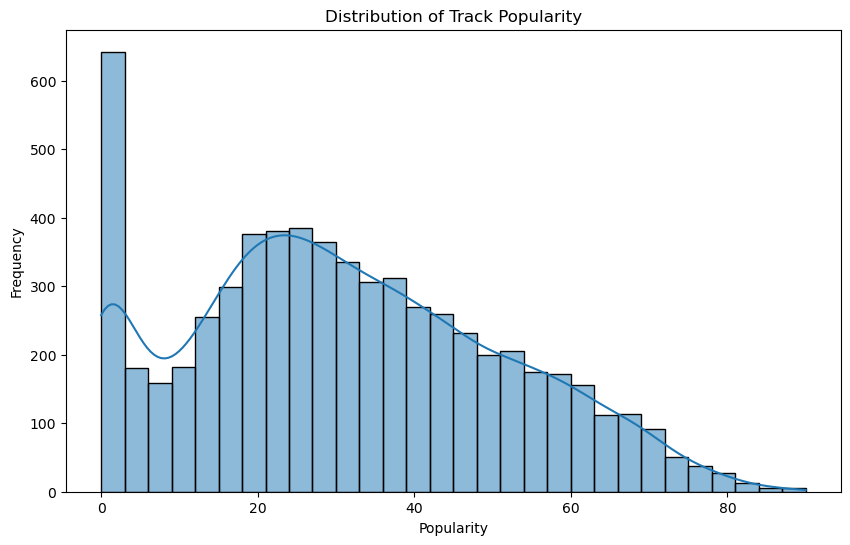

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'],bins=30,kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of track duration in minutes

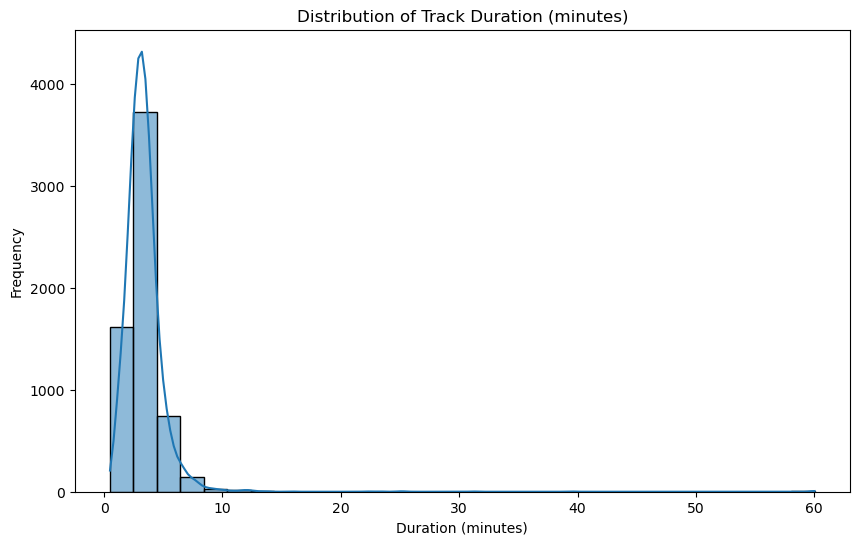

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['duration_minutes'],bins=30,kde=True)
plt.title('Distribution of Track Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count plot for explicit tracks

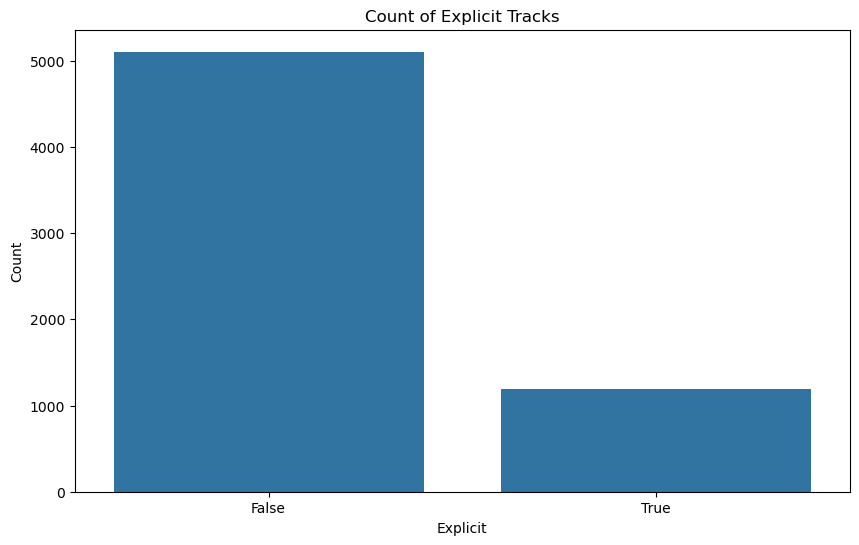

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='explicit', data=df)
plt.title('Count of Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

In [ ]:
# Correlation matrix

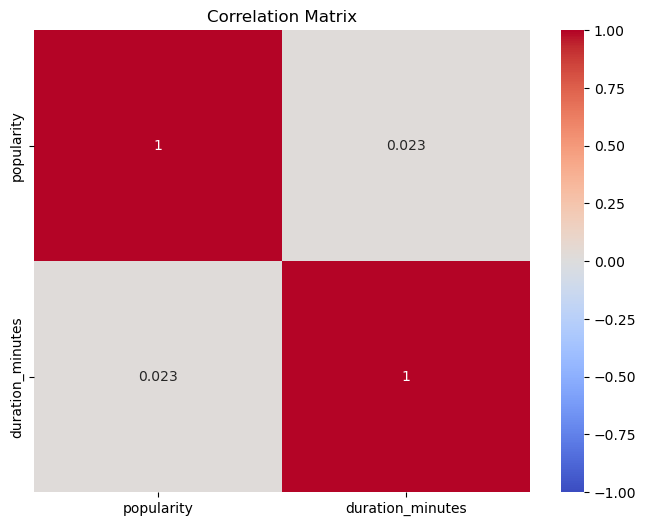

In [50]:
corr=df[['popularity','duration_minutes']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Top artists based on the number of tracks

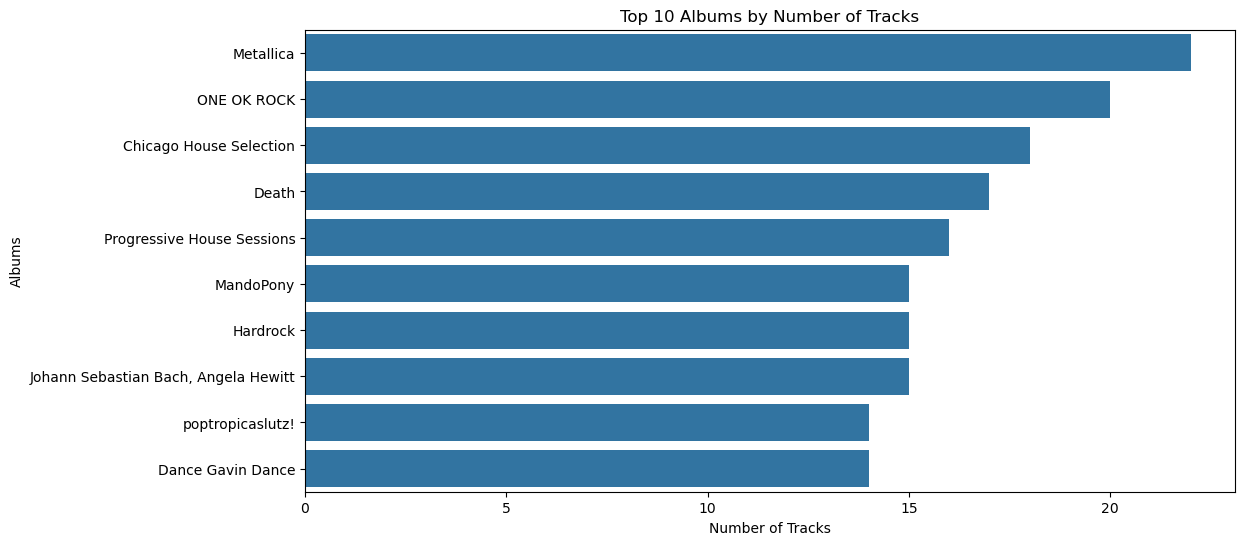

In [54]:
top_artists=df['artists'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values,y=top_artists.index)
plt.title('Top 10 Albums by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Albums')
plt.show()

In [ ]:
# Top 10 Genres by Average Popularity

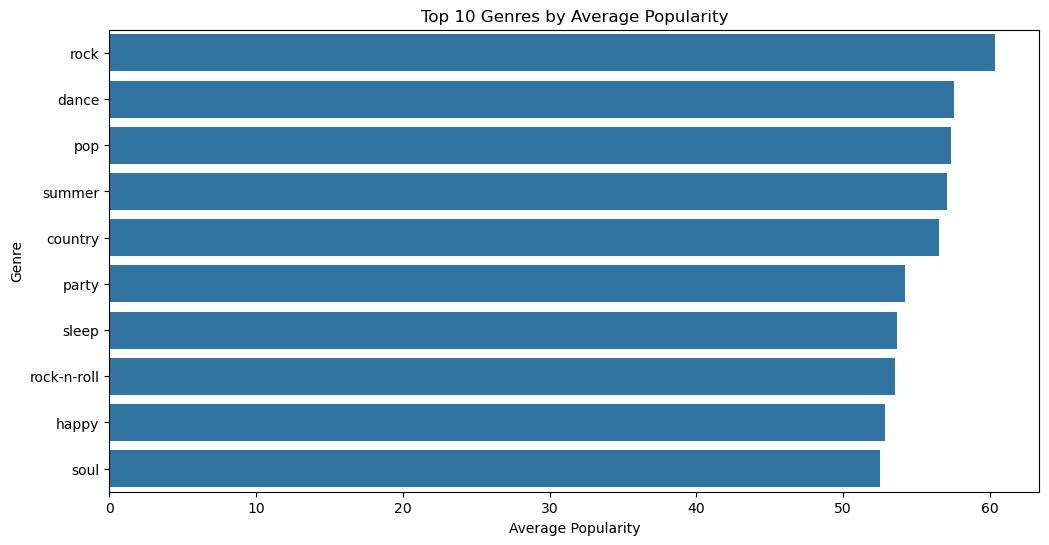

In [58]:
genre_popularity=df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Compare the popularity of explicit and non-explicit tracks

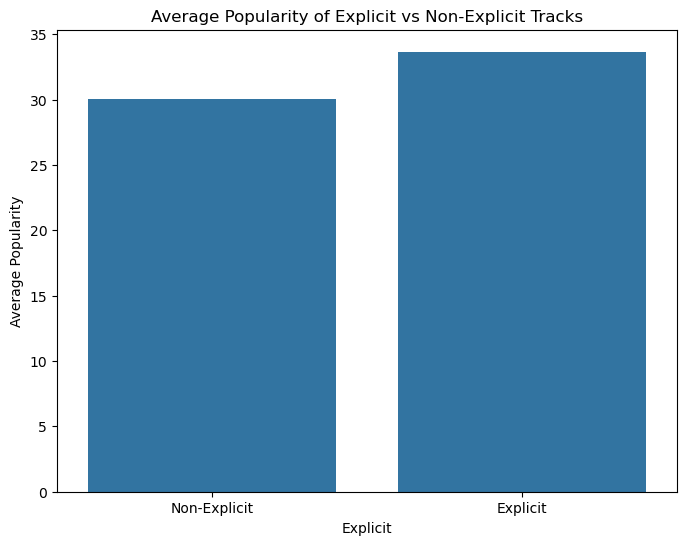

In [60]:
explicit_popularity=df.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=explicit_popularity.index,y=explicit_popularity.values)
plt.title('Average Popularity of Explicit vs Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Average Popularity')
plt.xticks([0,1],['Non-Explicit', 'Explicit'])
plt.show()

In [ ]:
# Top 15 Average track duration by genre

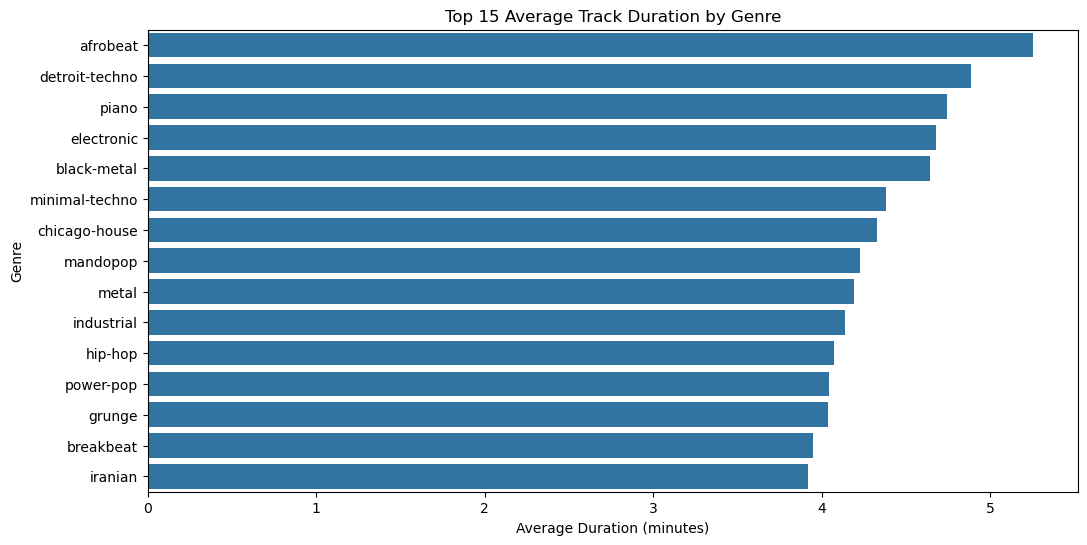

In [66]:
genre_duration= df.groupby('genre')['duration_minutes'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_duration.values, y=genre_duration.index)
plt.title('Top 15 Average Track Duration by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Save the cleaned data

In [74]:
df.to_csv('spotify_tracks_cleaned.csv', index=False)